# Titanic survival prediction 

This notebook goes through a basic exploratory data analysis of the Kaggle dataset with Python

## 1) Importing relevant depedencies 

In [6]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [7]:
conda install -c conda-forge catboost

^C

Note: you may need to restart the kernel to use updated packages.


In [8]:
#Importing train and test data

train = pd.read_csv("train.csv")
test = pd.read_csv("ttest.csv")
gender_submission = pd.read_csv("gender_submission.csv")

In [9]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
len(train)

891

In [13]:
len(test)

418

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking out missing values

<AxesSubplot:>

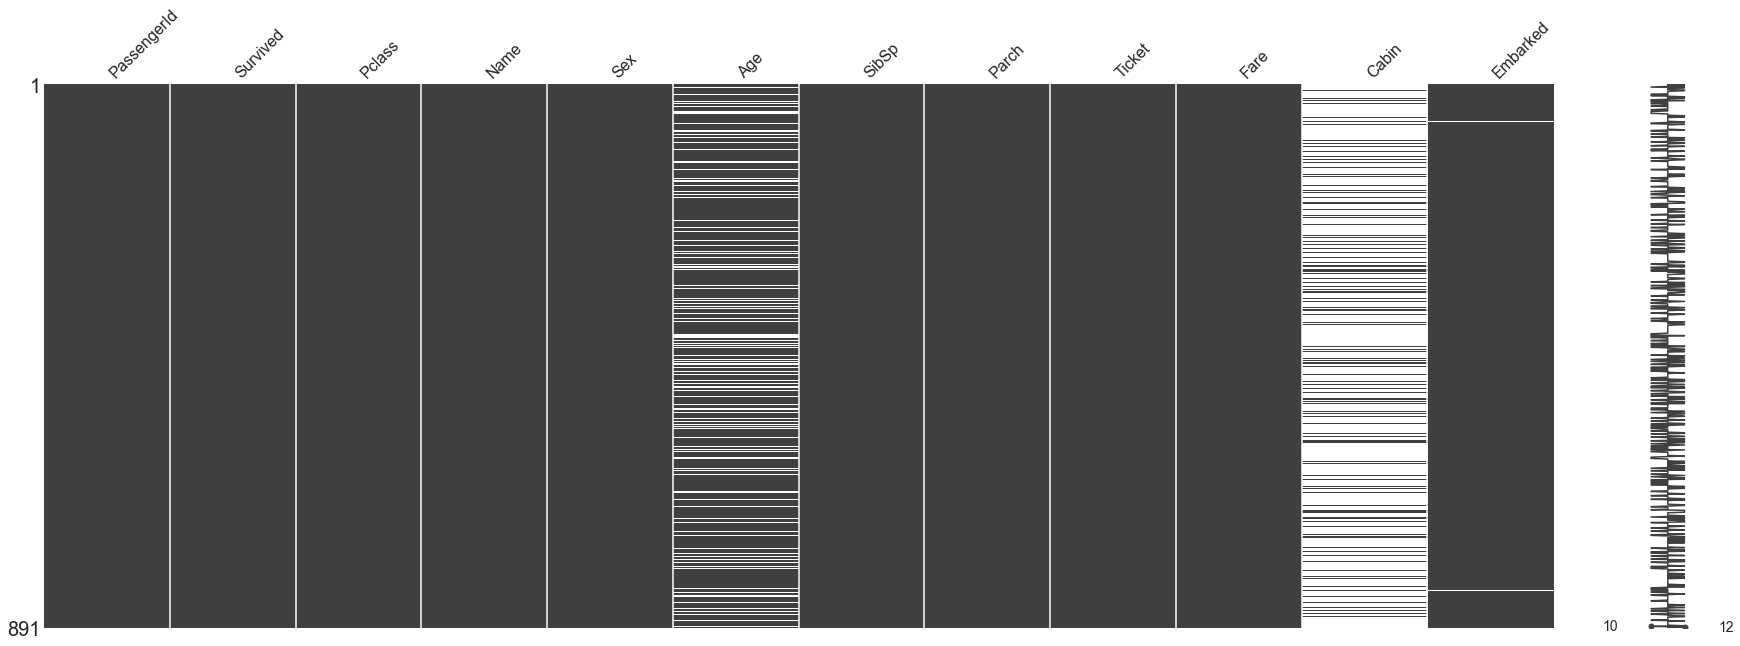

In [15]:
missingno.matrix(train, figsize=(30,10))

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Creating two new dataframes for data analysis

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [17]:
df_bin = pd.DataFrame() # for discretised continuous variables 0-10, 10-20
df_con = pd.DataFrame() # for continuous variables 

In [18]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Exploring each feature individually  

## Target feature : Survived

Key: 0: Not survied , 1: Survived

This is the feature we want to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


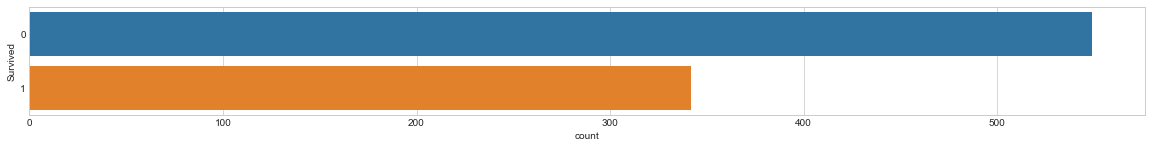

In [19]:
#How many survived 

fig,ax = plt.subplots(figsize=(20,2))
sns.countplot(y= "Survived", data = train)
print(train.Survived.value_counts())

In [20]:
#Adding this to our sub dataframes

df_bin["Survived"] = train["Survived"]
df_con["Survived"] = train["Survived"]

In [21]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [22]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass

Description : Ticket class of a passenger

Key: 1=1st , 2= 2nd , 3= 3rd 

* ordinal variable 



<AxesSubplot:xlabel='Pclass', ylabel='Density'>

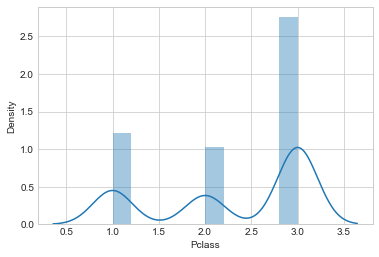

In [23]:
sns.distplot(train.Pclass) #Exploring the spread of values

We can see that the data in this feature is numerical yet they are categories

In [24]:
df_bin["Pclass"] = train["Pclass"] #Adding Pclass directly to sub dataframes as there are no missing values
df_con["Pclass"] = train["Pclass"] 

In [25]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Feature : Name

Description : The name of the passenger 

In [26]:
#To check different names 

train.Name.value_counts()[:50]

Roebling, Mr. Washington Augustus II                                 1
Dennis, Mr. Samuel                                                   1
Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)                   1
Shellard, Mr. Frederick William                                      1
Goodwin, Master. Sidney Leonard                                      1
Razi, Mr. Raihed                                                     1
Bracken, Mr. James H                                                 1
Panula, Master. Urho Abraham                                         1
Gustafsson, Mr. Alfred Ossian                                        1
Maenpaa, Mr. Matti Alexanteri                                        1
Calic, Mr. Jovo                                                      1
Carter, Rev. Ernest Courtenay                                        1
Palsson, Master. Gosta Leonard                                       1
Hale, Mr. Reginald                                                   1
Harris

In [27]:
len(train)

891

## Feature: Sex

Description : The sex of the passenger


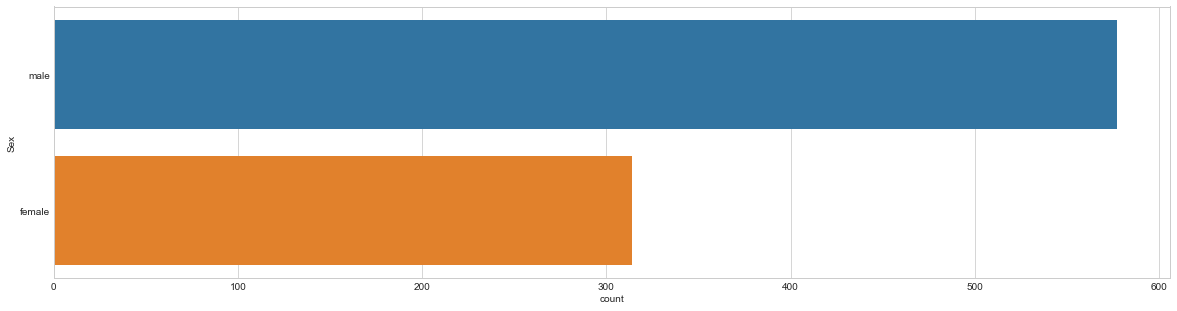

In [28]:
#Distribution of sex

ax,fig = plt.subplots(figsize=(20,5))
sns.countplot(y="Sex", data = train);


Since this data is already binary , we can add it to our sub dataframes.

In [29]:
df_bin["Sex"] = train["Sex"]

df_bin["Sex"] = np.where(df_bin["Sex"]=="female", 1,0)

df_con["Sex"] = train["Sex"]



In [30]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


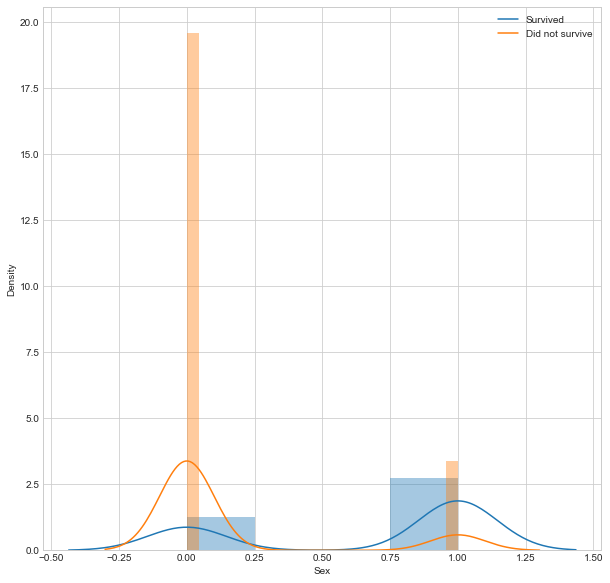

In [31]:
#How does the Sex variable look compared to Survival

fig,ax  = plt.subplots(figsize=(10,10))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'}); #blue- survived, yellow = not survive
plt.legend()

More number of females survived than number of men.

In [32]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature : Age

Description: Age of passenger

Out of 891 , 177 values are missing 

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

num_imputer = SimpleImputer(strategy = "median")

num_feature = ["Age"]

imputer= ColumnTransformer([("num_imputer", num_imputer, num_feature)])

#Transform the data 
filled_age = imputer.fit_transform(train)

filled_age



array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [34]:
Age_test = imputer.fit_transform(test)

In [35]:
train["AGE"] = filled_age
test["Age_test"] = Age_test

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


In [38]:
train = train.drop("Age", axis =1) # Dropping previous age columns which had missing values

In [39]:
test = test.drop("Age", axis =1)

In [40]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

In [41]:
df_con["Age"] = pd.cut(train["AGE"],10) # bucketed into different values
df_bin["Age"] = train["AGE"] #non bucketed values

In [42]:
df_con.head()


,Survived,Pclass,Sex,Age
0,0,3,male,"(16.336, 24.294]"
1,1,1,female,"(32.252, 40.21]"
2,1,3,female,"(24.294, 32.252]"
3,1,1,female,"(32.252, 40.21]"
4,0,3,male,"(32.252, 40.21]"


In [43]:
df_bin.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


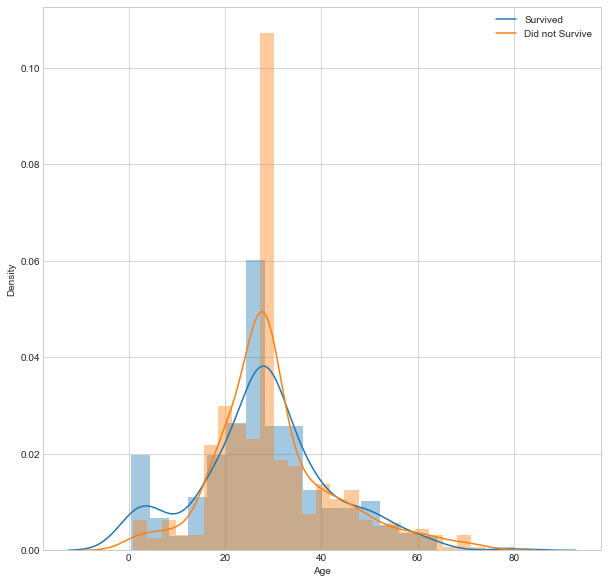

In [44]:
fig,ax  = plt.subplots(figsize=(10,10))

sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Age'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Age'], kde_kws={'label': 'Did not Survive'});

plt.legend()

# Function to create count and distribution plots

In [45]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
        plt.legend()

## Feature : SibSp

Description : No. of spouses/siblings the passenger has aboard the titanic



In [46]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [47]:
#Add SibSp to our subset Dataframes

df_bin["SibSp"] = train["SibSp"]
df_con["SibSp"] = train["SibSp"]

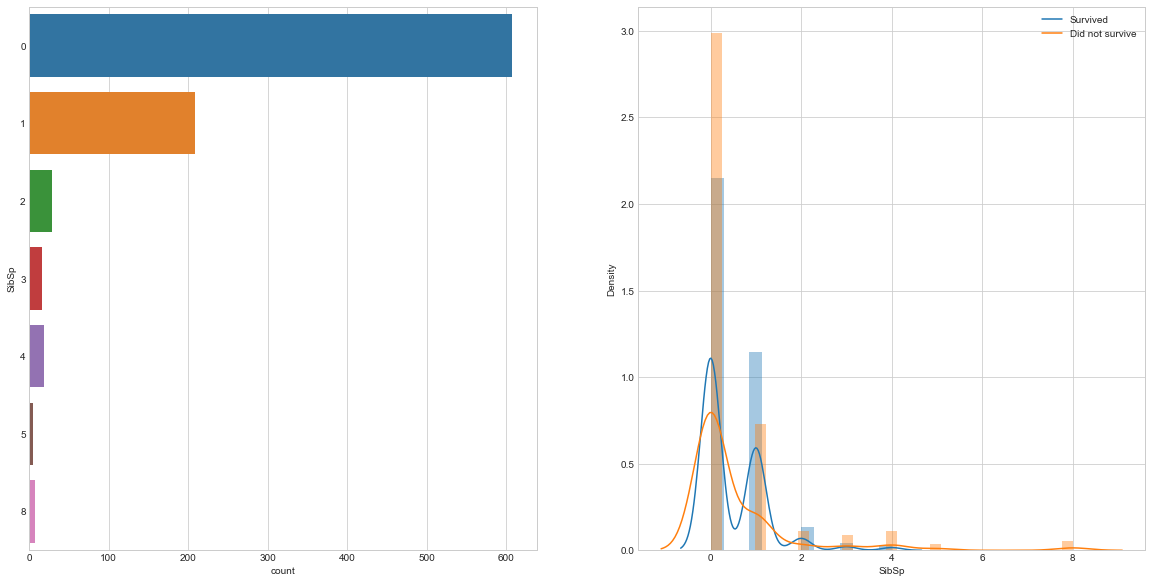

In [48]:
#Visualize the counts of SibSp and distribution of values against Survived

plot_count_dist(train,bin_df= df_bin, label_column="Survived", target_column = "SibSp", figsize = (20,10))


## Feature Parch

Description : The number of parents/children the passenger has aboard the Titanic.
This feature is similar to SibSp



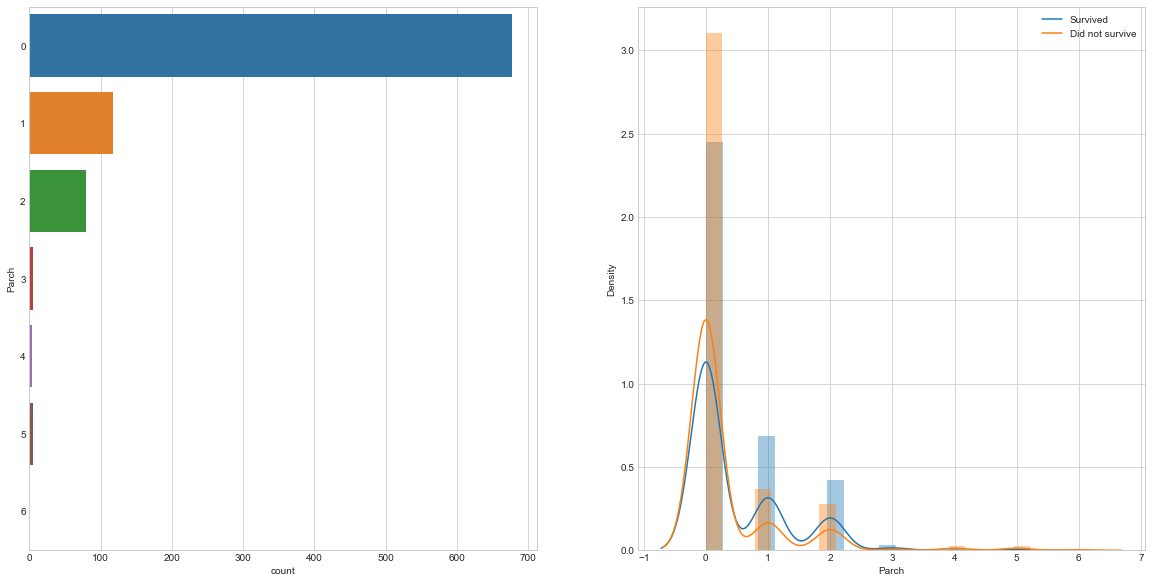

In [49]:
#Visualize the counts of Parch and distribution of the values
#Against Survived

plot_count_dist(train,bin_df=df_bin,label_column="Survived", target_column = "Parch",figsize=(20,10))

In [50]:
train.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [51]:
#Adding Parch to our subset dataframes

df_bin["Parch"] = train["Parch"]

df_con["Parch"] = train["Parch"]

In [52]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,"(16.336, 24.294]",1,0
1,1,1,female,"(32.252, 40.21]",1,0
2,1,3,female,"(24.294, 32.252]",0,0
3,1,1,female,"(32.252, 40.21]",1,0
4,0,3,male,"(32.252, 40.21]",0,0


In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


## Feature: Ticket

Description : Ticket number of boarding passenger 



In [54]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
347088      6
3101295     6
           ..
11755       1
350026      1
330919      1
2689        1
29103       1
Name: Ticket, Length: 681, dtype: int64

In [55]:
len(train.Ticket.unique()) #681 unique values

681

## Feature: Fare 

Description : The cost of ticket

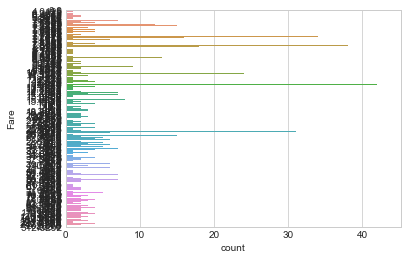

In [56]:
sns.countplot(y= "Fare", data = train);

In [57]:
len(train.Fare.unique()) #There are 248 unique values

248

In [58]:
df_con["Fare"] = train["Fare"] 

df_bin["Fare"] = pd.cut(train["Fare"], bins=5) #discretised

In [59]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,"(-0.512, 102.466]"
1,1,1,1,38.0,1,0,"(-0.512, 102.466]"
2,1,3,1,26.0,0,0,"(-0.512, 102.466]"
3,1,1,1,35.0,1,0,"(-0.512, 102.466]"
4,0,3,0,35.0,0,0,"(-0.512, 102.466]"


In [60]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,"(16.336, 24.294]",1,0,7.2500
1,1,1,female,"(32.252, 40.21]",1,0,71.2833
2,1,3,female,"(24.294, 32.252]",0,0,7.9250
3,1,1,female,"(32.252, 40.21]",1,0,53.1000
4,0,3,male,"(32.252, 40.21]",0,0,8.0500


In [61]:
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

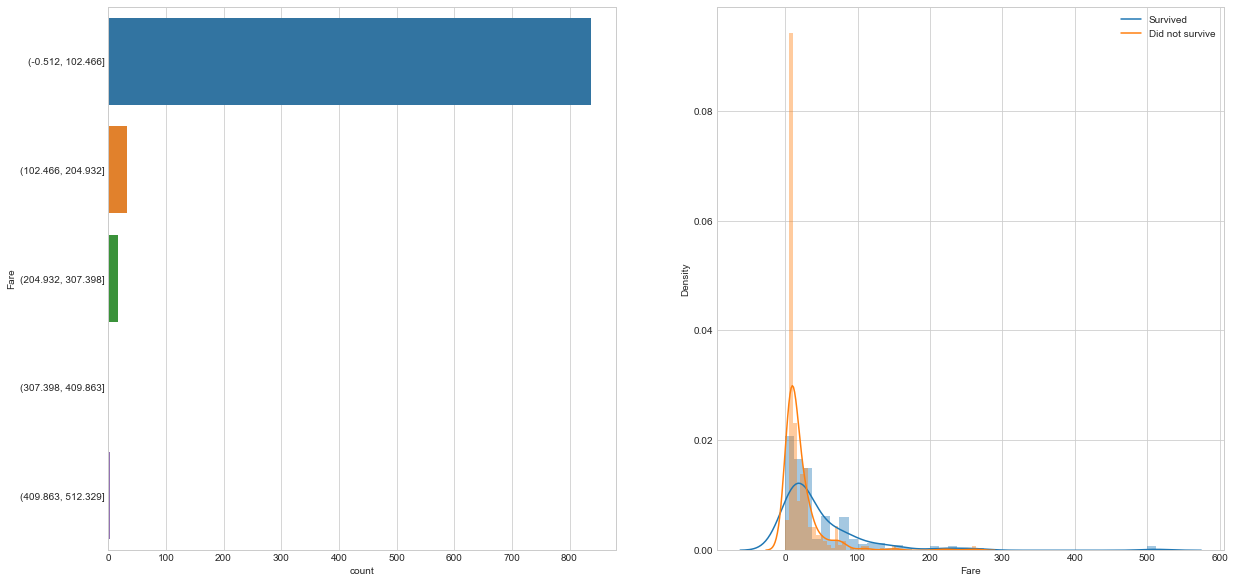

In [62]:
plot_count_dist(data= train, bin_df = df_bin,label_column = "Survived", target_column = "Fare", figsize =(20,10),use_bin_df= True )

## Feature : Cabin

Description : The cabin number where the passenger was staying 

In [63]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

We will not be using Cabin feature as it has so many missing values

## Feature : Embarked

Description: The port where the passenger boarded the Titanic 

C: Cherbourg Q = Queenstown S = Southampton 

In [64]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AGE              0
dtype: int64

In [65]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Embarked'>

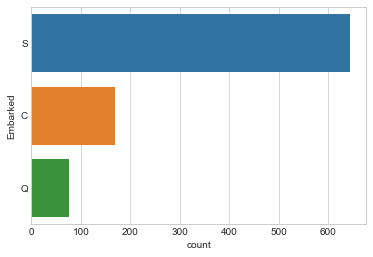

In [66]:
sns.countplot(y= "Embarked", data =train)

In [67]:
#Adding Embarked feature to sub dataframes

df_bin["Embarked"] = train["Embarked"]  
df_con["Embarked"] = train["Embarked"]

In [68]:
#Removing rows from Embarked feature having missing values
print(len(df_con))
df_con = df_con.dropna(subset=["Embarked"])
df_bin= df_bin.dropna(subset=["Embarked"])
print(len(df_con))

891
889


In [69]:
df_bin.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,"(-0.512, 102.466]",S
1,1,1,1,38.0,1,0,"(-0.512, 102.466]",C
2,1,3,1,26.0,0,0,"(-0.512, 102.466]",S
3,1,1,1,35.0,1,0,"(-0.512, 102.466]",S
4,0,3,0,35.0,0,0,"(-0.512, 102.466]",S


In [70]:
df_con.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,"(16.336, 24.294]",1,0,7.2500,S
1,1,1,female,"(32.252, 40.21]",1,0,71.2833,C
2,1,3,female,"(24.294, 32.252]",0,0,7.9250,S
3,1,1,female,"(32.252, 40.21]",1,0,53.1000,S
4,0,3,male,"(32.252, 40.21]",0,0,8.0500,S


In [71]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AGE
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


# Feature Encoding

Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.



In [72]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_0.42,Age_0.67,Age_0.75,Age_0.83,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [73]:

# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [74]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [75]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,"(16.336, 24.294]",1,0,7.2500,0,0,1,0,1,0,0,1
1,1,"(32.252, 40.21]",1,0,71.2833,1,0,0,1,0,1,0,0
2,1,"(24.294, 32.252]",0,0,7.9250,0,0,1,1,0,0,0,1
3,1,"(32.252, 40.21]",1,0,53.1000,0,0,1,1,0,1,0,0
4,0,"(32.252, 40.21]",0,0,8.0500,0,0,1,0,1,0,0,1
5,0,"(24.294, 32.252]",0,0,8.4583,0,1,0,0,1,0,0,1
6,0,"(48.168, 56.126]",0,0,51.8625,0,0,1,0,1,1,0,0
7,0,"(0.34, 8.378]",3,1,21.0750,0,0,1,0,1,0,0,1
8,1,"(24.294, 32.252]",0,2,11.1333,0,0,1,1,0,0,0,1
9,1,"(8.378, 16.336]",1,0,30.0708,1,0,0,1,0,0,1,0


## Building ML models

### Separating the data

In [76]:
#Select the dataframe we want to use

selected_df = df_con_enc

In [77]:
df_con_enc = df_con_enc.drop("Age", axis = 1)

In [78]:
df_con_enc["Age"] = train["AGE"]

In [79]:
selected_df.drop("Age", axis =1)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,13.0000,0,0,1,0,1,0,1,0
887,1,0,0,30.0000,0,0,1,1,0,1,0,0
888,0,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,0,0,30.0000,1,0,0,0,1,1,0,0


In [80]:
selected_df["Age"] =  df_con_enc["Age"]

In [81]:
X_train = selected_df.drop("Survived" , axis =1)

y_train = selected_df["Survived"]

In [82]:
X_train.shape

(889, 12)

In [83]:
y_train.shape

(889,)

In [84]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train,y_train) *100,2)
    
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100,2)
    
    return train_pred, acc ,acc_cv

In [85]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 80.54
Accuracy CV 10-Fold: 79.75
Running Time: 0:00:03.055220


In [86]:

# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.45
Accuracy CV 10-Fold: 71.54
Running Time: 0:00:00.191516


In [87]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 78.29
Running Time: 0:00:00.039893


In [88]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 68.84
Accuracy CV 10-Fold: 73.12
Running Time: 0:00:00.210436


In [89]:

# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 78.63
Accuracy CV 10-Fold: 72.33
Running Time: 0:00:00.781418


In [90]:

# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 97.98
Accuracy CV 10-Fold: 78.97
Running Time: 0:00:00.143158


In [91]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 89.43
Accuracy CV 10-Fold: 82.79
Running Time: 0:00:00.365023


## Catboost Algorithm

In [92]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [93]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [94]:
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [95]:
X_train["Age"] = X_train["Age"].astype(int)

In [96]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [97]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [98]:
#Catboost model definition 

catboost_model = CatBoostClassifier(iterations = 1000, custom_loss= ["Accuracy"], loss_function = "Logloss")

#Fit Catboost model 

catboost_model.fit(train_pool,plot = True)

#Catboost accuracy

acc_catboost = round(catboost_model.score(X_train,y_train)*100,2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6865149	total: 68.9ms	remaining: 1m 8s
1:	learn: 0.6808094	total: 84.3ms	remaining: 42.1s
2:	learn: 0.6755095	total: 101ms	remaining: 33.6s
3:	learn: 0.6720507	total: 106ms	remaining: 26.4s
4:	learn: 0.6667084	total: 119ms	remaining: 23.7s
5:	learn: 0.6623282	total: 137ms	remaining: 22.7s
6:	learn: 0.6574390	total: 153ms	remaining: 21.8s
7:	learn: 0.6540734	total: 164ms	remaining: 20.4s
8:	learn: 0.6493973	total: 173ms	remaining: 19.1s
9:	learn: 0.6443956	total: 195ms	remaining: 19.3s
10:	learn: 0.6397858	total: 218ms	remaining: 19.6s
11:	learn: 0.6350111	total: 232ms	remaining: 19.1s
12:	learn: 0.6298100	total: 247ms	remaining: 18.8s
13:	learn: 0.6247848	total: 260ms	remaining: 18.3s
14:	learn: 0.6197236	total: 272ms	remaining: 17.9s
15:	learn: 0.6160961	total: 284ms	remaining: 17.5s
16:	learn: 0.6115428	total: 297ms	remaining: 17.2s
17:	learn: 0.6076905	total: 306ms	remaining: 16.7s
18:	learn: 0.6047138	total: 319ms	remaining: 16.5s
19:	learn

170:	learn: 0.4139753	total: 2.35s	remaining: 11.4s
171:	learn: 0.4138568	total: 2.36s	remaining: 11.4s
172:	learn: 0.4138380	total: 2.37s	remaining: 11.3s
173:	learn: 0.4135925	total: 2.38s	remaining: 11.3s
174:	learn: 0.4131795	total: 2.4s	remaining: 11.3s
175:	learn: 0.4131644	total: 2.4s	remaining: 11.2s
176:	learn: 0.4126966	total: 2.41s	remaining: 11.2s
177:	learn: 0.4123465	total: 2.43s	remaining: 11.2s
178:	learn: 0.4122887	total: 2.44s	remaining: 11.2s
179:	learn: 0.4121105	total: 2.45s	remaining: 11.2s
180:	learn: 0.4118487	total: 2.46s	remaining: 11.1s
181:	learn: 0.4115456	total: 2.48s	remaining: 11.1s
182:	learn: 0.4115009	total: 2.48s	remaining: 11.1s
183:	learn: 0.4108595	total: 2.5s	remaining: 11.1s
184:	learn: 0.4107653	total: 2.5s	remaining: 11s
185:	learn: 0.4107531	total: 2.5s	remaining: 11s
186:	learn: 0.4104799	total: 2.52s	remaining: 10.9s
187:	learn: 0.4102819	total: 2.53s	remaining: 10.9s
188:	learn: 0.4098554	total: 2.55s	remaining: 10.9s
189:	learn: 0.4096397

332:	learn: 0.3779453	total: 4.83s	remaining: 9.67s
333:	learn: 0.3777274	total: 4.84s	remaining: 9.65s
334:	learn: 0.3776150	total: 4.86s	remaining: 9.64s
335:	learn: 0.3775067	total: 4.87s	remaining: 9.63s
336:	learn: 0.3773667	total: 4.88s	remaining: 9.61s
337:	learn: 0.3772295	total: 4.9s	remaining: 9.6s
338:	learn: 0.3770659	total: 4.91s	remaining: 9.58s
339:	learn: 0.3768962	total: 4.93s	remaining: 9.57s
340:	learn: 0.3767904	total: 4.94s	remaining: 9.55s
341:	learn: 0.3765714	total: 4.96s	remaining: 9.53s
342:	learn: 0.3765164	total: 4.97s	remaining: 9.52s
343:	learn: 0.3763978	total: 4.98s	remaining: 9.5s
344:	learn: 0.3763852	total: 4.99s	remaining: 9.47s
345:	learn: 0.3761787	total: 5s	remaining: 9.46s
346:	learn: 0.3760742	total: 5.02s	remaining: 9.45s
347:	learn: 0.3760440	total: 5.03s	remaining: 9.42s
348:	learn: 0.3759585	total: 5.05s	remaining: 9.42s
349:	learn: 0.3757975	total: 5.07s	remaining: 9.42s
350:	learn: 0.3757972	total: 5.08s	remaining: 9.39s
351:	learn: 0.3755

502:	learn: 0.3535544	total: 7.48s	remaining: 7.39s
503:	learn: 0.3533501	total: 7.5s	remaining: 7.38s
504:	learn: 0.3532911	total: 7.51s	remaining: 7.37s
505:	learn: 0.3530619	total: 7.53s	remaining: 7.35s
506:	learn: 0.3530601	total: 7.53s	remaining: 7.32s
507:	learn: 0.3529438	total: 7.54s	remaining: 7.31s
508:	learn: 0.3527798	total: 7.56s	remaining: 7.29s
509:	learn: 0.3527146	total: 7.57s	remaining: 7.27s
510:	learn: 0.3526208	total: 7.58s	remaining: 7.25s
511:	learn: 0.3525077	total: 7.59s	remaining: 7.23s
512:	learn: 0.3524050	total: 7.6s	remaining: 7.22s
513:	learn: 0.3522947	total: 7.61s	remaining: 7.2s
514:	learn: 0.3520242	total: 7.63s	remaining: 7.18s
515:	learn: 0.3519658	total: 7.64s	remaining: 7.17s
516:	learn: 0.3518914	total: 7.65s	remaining: 7.15s
517:	learn: 0.3517847	total: 7.67s	remaining: 7.14s
518:	learn: 0.3517723	total: 7.69s	remaining: 7.13s
519:	learn: 0.3516081	total: 7.71s	remaining: 7.11s
520:	learn: 0.3515717	total: 7.72s	remaining: 7.1s
521:	learn: 0.35

668:	learn: 0.3342414	total: 10.1s	remaining: 5s
669:	learn: 0.3340847	total: 10.1s	remaining: 4.99s
670:	learn: 0.3338481	total: 10.1s	remaining: 4.97s
671:	learn: 0.3337710	total: 10.2s	remaining: 4.96s
672:	learn: 0.3336689	total: 10.2s	remaining: 4.94s
673:	learn: 0.3336378	total: 10.2s	remaining: 4.92s
674:	learn: 0.3335281	total: 10.2s	remaining: 4.91s
675:	learn: 0.3333748	total: 10.2s	remaining: 4.89s
676:	learn: 0.3332876	total: 10.2s	remaining: 4.88s
677:	learn: 0.3330128	total: 10.2s	remaining: 4.86s
678:	learn: 0.3329277	total: 10.2s	remaining: 4.84s
679:	learn: 0.3326258	total: 10.3s	remaining: 4.83s
680:	learn: 0.3323995	total: 10.3s	remaining: 4.81s
681:	learn: 0.3320807	total: 10.3s	remaining: 4.79s
682:	learn: 0.3318521	total: 10.3s	remaining: 4.78s
683:	learn: 0.3318432	total: 10.3s	remaining: 4.76s
684:	learn: 0.3317614	total: 10.3s	remaining: 4.74s
685:	learn: 0.3317083	total: 10.3s	remaining: 4.73s
686:	learn: 0.3316398	total: 10.3s	remaining: 4.71s
687:	learn: 0.3


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.05=py38_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




840:	learn: 0.3140255	total: 12.8s	remaining: 2.41s
841:	learn: 0.3137990	total: 12.8s	remaining: 2.4s
842:	learn: 0.3136609	total: 12.8s	remaining: 2.38s
843:	learn: 0.3136307	total: 12.8s	remaining: 2.37s
844:	learn: 0.3135729	total: 12.8s	remaining: 2.35s
845:	learn: 0.3134258	total: 12.8s	remaining: 2.33s
846:	learn: 0.3133372	total: 12.8s	remaining: 2.32s
847:	learn: 0.3132381	total: 12.9s	remaining: 2.3s
848:	learn: 0.3130750	total: 12.9s	remaining: 2.29s
849:	learn: 0.3130037	total: 12.9s	remaining: 2.27s
850:	learn: 0.3128160	total: 12.9s	remaining: 2.26s
851:	learn: 0.3125881	total: 12.9s	remaining: 2.25s
852:	learn: 0.3125468	total: 12.9s	remaining: 2.23s
853:	learn: 0.3124938	total: 12.9s	remaining: 2.21s
854:	learn: 0.3124282	total: 13s	remaining: 2.2s
855:	learn: 0.3123040	total: 13s	remaining: 2.18s
856:	learn: 0.3120267	total: 13s	remaining: 2.17s
857:	learn: 0.3118750	total: 13s	remaining: 2.15s
858:	learn: 0.3116727	total: 13s	remaining: 2.14s
859:	learn: 0.3115586	tot

In [99]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6818104	test: 0.6818696	best: 0.6818696 (0)
1:	learn: 0.6641740	test: 0.6645792	best: 0.6645792 (1)
2:	learn: 0.6477853	test: 0.6486508	best: 0.6486508 (2)
3:	learn: 0.6341319	test: 0.6354933	best: 0.6354933 (3)
4:	learn: 0.6210395	test: 0.6230484	best: 0.6230484 (4)
5:	learn: 0.6091194	test: 0.6117204	best: 0.6117204 (5)
6:	learn: 0.5966905	test: 0.6004243	best: 0.6004243 (6)
7:	learn: 0.5856038	test: 0.5902708	best: 0.5902708 (7)
8:	learn: 0.5746275	test: 0.5805175	best: 0.5805175 (8)
9:	learn: 0.5656285	test: 0.5720328	best: 0.5720328 (9)
10:	learn: 0.5574984	test: 0.5641349	best: 0.5641349 (10)
11:	learn: 0.5488245	test: 0.5563887	best: 0.5563887 (11)
12:	learn: 0.5412785	test: 0.5492149	best: 0.5492149 (12)
13:	learn: 0.5337411	test: 0.5422039	best: 0.5422039 (13)
14:	learn: 0.5272699	test: 0.5364186	best: 0.5364186 (14)
15:	learn: 0.5201832	test: 0.5300583	best: 0.5300583 (15)
16:	learn: 0.5142649	test: 0.5250457	best: 0.5250457 (16)
17:	learn: 0.5090788	test: 0.52001

161:	learn: 0.3540258	test: 0.4348855	best: 0.4348047 (157)
162:	learn: 0.3535194	test: 0.4346554	best: 0.4346554 (162)
163:	learn: 0.3531800	test: 0.4345848	best: 0.4345848 (163)
164:	learn: 0.3527255	test: 0.4346000	best: 0.4345848 (163)
165:	learn: 0.3522063	test: 0.4345791	best: 0.4345791 (165)
166:	learn: 0.3518495	test: 0.4345366	best: 0.4345366 (166)
167:	learn: 0.3513917	test: 0.4343679	best: 0.4343679 (167)
168:	learn: 0.3509931	test: 0.4340783	best: 0.4340783 (168)
169:	learn: 0.3507244	test: 0.4340116	best: 0.4340116 (169)
170:	learn: 0.3503969	test: 0.4338483	best: 0.4338483 (170)
171:	learn: 0.3500147	test: 0.4337076	best: 0.4337076 (171)
172:	learn: 0.3496731	test: 0.4336241	best: 0.4336241 (172)
173:	learn: 0.3493213	test: 0.4337413	best: 0.4336241 (172)
174:	learn: 0.3489431	test: 0.4335698	best: 0.4335698 (174)
175:	learn: 0.3485239	test: 0.4335912	best: 0.4335698 (174)
176:	learn: 0.3481078	test: 0.4336369	best: 0.4335698 (174)
177:	learn: 0.3477387	test: 0.4335497	be

309:	learn: 0.3015657	test: 0.4326223	best: 0.4326223 (309)
310:	learn: 0.3013032	test: 0.4326569	best: 0.4326223 (309)
311:	learn: 0.3010923	test: 0.4326377	best: 0.4326223 (309)
312:	learn: 0.3008796	test: 0.4326012	best: 0.4326012 (312)
313:	learn: 0.3006981	test: 0.4324854	best: 0.4324854 (313)
314:	learn: 0.3004571	test: 0.4325247	best: 0.4324854 (313)
315:	learn: 0.3001730	test: 0.4325696	best: 0.4324854 (313)
316:	learn: 0.2996685	test: 0.4325475	best: 0.4324854 (313)
317:	learn: 0.2994216	test: 0.4325854	best: 0.4324854 (313)
318:	learn: 0.2991540	test: 0.4325838	best: 0.4324854 (313)
319:	learn: 0.2987518	test: 0.4325268	best: 0.4324854 (313)
320:	learn: 0.2983316	test: 0.4326681	best: 0.4324854 (313)
321:	learn: 0.2978938	test: 0.4326191	best: 0.4324854 (313)
322:	learn: 0.2974570	test: 0.4325642	best: 0.4324854 (313)
323:	learn: 0.2970925	test: 0.4325683	best: 0.4324854 (313)
324:	learn: 0.2968725	test: 0.4326353	best: 0.4324854 (313)
325:	learn: 0.2964150	test: 0.4327900	be

455:	learn: 0.2595954	test: 0.4347955	best: 0.4324854 (313)
456:	learn: 0.2592555	test: 0.4347827	best: 0.4324854 (313)
457:	learn: 0.2589821	test: 0.4349098	best: 0.4324854 (313)
458:	learn: 0.2587363	test: 0.4349647	best: 0.4324854 (313)
459:	learn: 0.2584463	test: 0.4350043	best: 0.4324854 (313)
460:	learn: 0.2582545	test: 0.4350792	best: 0.4324854 (313)
461:	learn: 0.2580238	test: 0.4350369	best: 0.4324854 (313)
462:	learn: 0.2576669	test: 0.4350087	best: 0.4324854 (313)
463:	learn: 0.2573887	test: 0.4352117	best: 0.4324854 (313)
464:	learn: 0.2570615	test: 0.4350405	best: 0.4324854 (313)
465:	learn: 0.2568294	test: 0.4349828	best: 0.4324854 (313)
466:	learn: 0.2565510	test: 0.4349075	best: 0.4324854 (313)
467:	learn: 0.2563708	test: 0.4350826	best: 0.4324854 (313)
468:	learn: 0.2561181	test: 0.4351211	best: 0.4324854 (313)
469:	learn: 0.2558212	test: 0.4350139	best: 0.4324854 (313)
470:	learn: 0.2555609	test: 0.4350589	best: 0.4324854 (313)
471:	learn: 0.2553548	test: 0.4350555	be

598:	learn: 0.2265311	test: 0.4358656	best: 0.4324854 (313)
599:	learn: 0.2264127	test: 0.4358713	best: 0.4324854 (313)
600:	learn: 0.2262336	test: 0.4359126	best: 0.4324854 (313)
601:	learn: 0.2260814	test: 0.4360007	best: 0.4324854 (313)
602:	learn: 0.2258779	test: 0.4360676	best: 0.4324854 (313)
603:	learn: 0.2255754	test: 0.4360224	best: 0.4324854 (313)
604:	learn: 0.2254151	test: 0.4359910	best: 0.4324854 (313)
605:	learn: 0.2251762	test: 0.4359477	best: 0.4324854 (313)
606:	learn: 0.2249745	test: 0.4359500	best: 0.4324854 (313)
607:	learn: 0.2247756	test: 0.4359723	best: 0.4324854 (313)
608:	learn: 0.2245684	test: 0.4358656	best: 0.4324854 (313)
609:	learn: 0.2243129	test: 0.4358752	best: 0.4324854 (313)
610:	learn: 0.2240747	test: 0.4358659	best: 0.4324854 (313)
611:	learn: 0.2238885	test: 0.4358897	best: 0.4324854 (313)
612:	learn: 0.2236591	test: 0.4358222	best: 0.4324854 (313)
613:	learn: 0.2233905	test: 0.4358217	best: 0.4324854 (313)
614:	learn: 0.2232199	test: 0.4357448	be

766:	learn: 0.1956383	test: 0.4371599	best: 0.4324854 (313)
767:	learn: 0.1954731	test: 0.4373410	best: 0.4324854 (313)
768:	learn: 0.1952984	test: 0.4373948	best: 0.4324854 (313)
769:	learn: 0.1951245	test: 0.4373168	best: 0.4324854 (313)
770:	learn: 0.1949695	test: 0.4372735	best: 0.4324854 (313)
771:	learn: 0.1947971	test: 0.4371570	best: 0.4324854 (313)
772:	learn: 0.1946349	test: 0.4371368	best: 0.4324854 (313)
773:	learn: 0.1944778	test: 0.4372132	best: 0.4324854 (313)
774:	learn: 0.1943444	test: 0.4372749	best: 0.4324854 (313)
775:	learn: 0.1941577	test: 0.4373500	best: 0.4324854 (313)
776:	learn: 0.1939429	test: 0.4374717	best: 0.4324854 (313)
777:	learn: 0.1937454	test: 0.4373466	best: 0.4324854 (313)
778:	learn: 0.1935935	test: 0.4373423	best: 0.4324854 (313)
779:	learn: 0.1934591	test: 0.4374421	best: 0.4324854 (313)
780:	learn: 0.1932794	test: 0.4374450	best: 0.4324854 (313)
781:	learn: 0.1931014	test: 0.4373126	best: 0.4324854 (313)
782:	learn: 0.1929502	test: 0.4372749	be

916:	learn: 0.1721384	test: 0.4390365	best: 0.4324854 (313)
917:	learn: 0.1720166	test: 0.4390187	best: 0.4324854 (313)
918:	learn: 0.1718898	test: 0.4390995	best: 0.4324854 (313)
919:	learn: 0.1717812	test: 0.4391180	best: 0.4324854 (313)
920:	learn: 0.1716672	test: 0.4391118	best: 0.4324854 (313)
921:	learn: 0.1715817	test: 0.4391404	best: 0.4324854 (313)
922:	learn: 0.1714569	test: 0.4389379	best: 0.4324854 (313)
923:	learn: 0.1713147	test: 0.4391002	best: 0.4324854 (313)
924:	learn: 0.1711897	test: 0.4392735	best: 0.4324854 (313)
925:	learn: 0.1710375	test: 0.4393774	best: 0.4324854 (313)
926:	learn: 0.1708591	test: 0.4394781	best: 0.4324854 (313)
927:	learn: 0.1707459	test: 0.4394062	best: 0.4324854 (313)
928:	learn: 0.1706001	test: 0.4394231	best: 0.4324854 (313)
929:	learn: 0.1704003	test: 0.4396332	best: 0.4324854 (313)
930:	learn: 0.1702779	test: 0.4397012	best: 0.4324854 (313)
931:	learn: 0.1701329	test: 0.4397208	best: 0.4324854 (313)
932:	learn: 0.1699547	test: 0.4396646	be

In [100]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 85.49
Accuracy cross-validation 10-Fold: 81.77
Running Time: 0:02:12.874115


## Model Results

In [101]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,97.98
6,Gradient Boosting Trees,89.43
7,CatBoost,85.49
0,KNN,82.45
1,Logistic Regression,80.54
3,Stochastic Gradient Decent,78.63
2,Naive Bayes,78.52
4,Linear SVC,68.84


In [102]:

cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
6,Gradient Boosting Trees,82.79
7,CatBoost,81.77
1,Logistic Regression,79.75
5,Decision Tree,78.97
2,Naive Bayes,78.29
4,Linear SVC,73.12
3,Stochastic Gradient Decent,72.33
0,KNN,71.54


## Feature importance

In [103]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,imp,col
5,0.571310,embarked_Q
4,1.144747,embarked_C
10,1.768155,pclass_2
6,1.874346,embarked_S
9,2.990734,pclass_1
11,9.046338,pclass_3
8,11.745562,sex_male
3,11.853853,Fare
1,12.921846,SibSp
2,14.143386,Parch


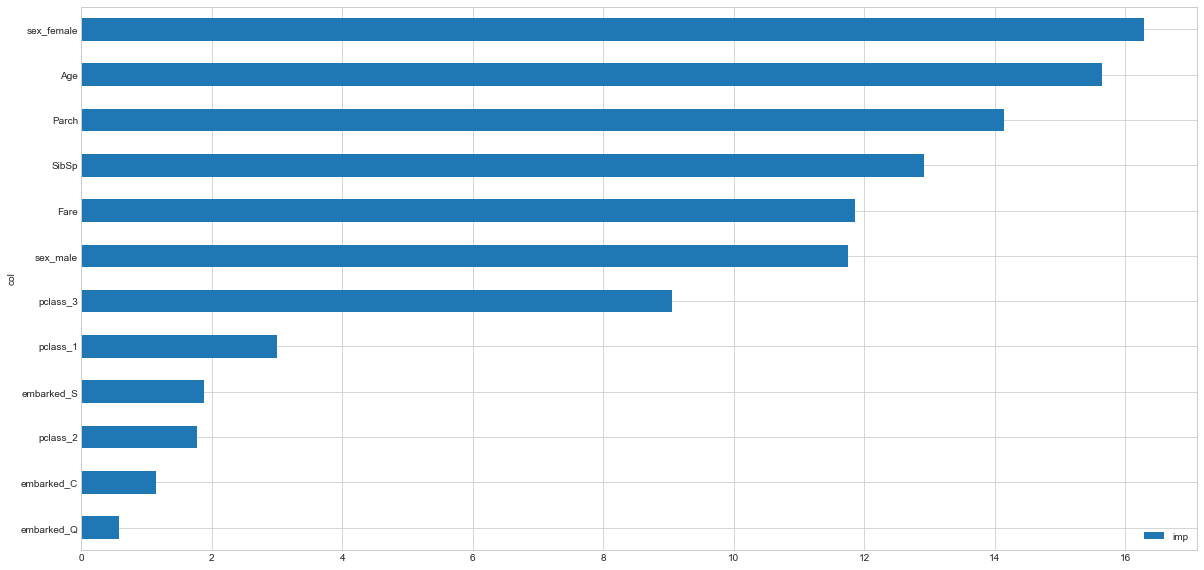

In [104]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

In [105]:

metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8454199564239424
Recall: 0.6954617647058824
F1: 0.7630903187112227
AUC: 0.8946746571306118


In [106]:

# We need our test dataframe to look like this one
X_train.head()

,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,0,0,1,1,0,1,0,0
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [107]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0


In [108]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [109]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [110]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_test,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0,0,0,1,1,0,0,0,1


In [111]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q',
       'embarked_S', 'sex_female', 'sex_male', 'pclass_1', 'pclass_2',
       'pclass_3'],
      dtype='object')

In [112]:
test = test.rename(columns = {"Age_test": "Age"})


In [113]:
test["Age"] = test["Age"].astype(int)

In [114]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22,0,0,1,1,0,0,0,1


In [115]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [116]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [117]:
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [118]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [119]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [120]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../kaggle_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [121]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../kaggle_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [122]:
import pickle

In [123]:
pickle.dump(catboost_model, open("model.pkl", "wb"))

In [124]:
model = pickle.load(open("model.pkl", 'rb'))

In [125]:
print(model.predict([[52,0,0,9.8,0,1,1,1,0,1,0,0]]))

[1]
